In [1]:
import os, sys
path = os.path.abspath(os.path.join('..'))
os.chdir(path)
if path not in sys.path:
    sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import niceplots
plt.style.use(niceplots.get_style())

from optim import TopOpt, Post2D, Post3D

# Test case
- Half MBB 168 mm x 80 mm x 8 mm
- Mesh:
    - **2D**: 42 x 20 elements (4 mm element)
    - **3D**: 42 x 20 x 2 elements (4 mm element)
- 1 kN downward force


- Cellulose and 0.5 bamboo
- volfrac = 0.3
- r_rho = 8
- r_theta = 20
- theta0 = -30°
- 100 iterations

In [3]:
# {t/mm^3, MPa, -, kgCO2/kg}
bamboo     = {'rho': 700e-12, 'E': 17.5e3, 'v': 0.04, 'CO2': 1.0565}
cellulose  = {'rho': 990e-12, 'E': 3.25e3, 'v': 0.355, 'CO2': 3.8}
Vfiber  = 0.5

Ex, Ey, nuxy, nuyz, Gxy, rho, CO2mat = TopOpt.rule_mixtures(fiber=bamboo, matrix=cellulose, Vfiber=Vfiber)
CO2veh = 1030 * 25 * 3.83 # kg_fuel/kg_transported/year * years * kgCO2/kg_fuel = kgCO2/kg

In [4]:
solver1 = TopOpt(inputfile='models/mbb2d.db', res_dir='results/mbb/2d/', dim='2D', jobname='2d')
solver1.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver1.set_volfrac(0.3)
solver1.set_filters(r_rho=8, r_theta=20)
solver1.set_initial_conditions('fix', theta0=-30)
solver1.set_optim_options(max_iter=100)

solver1.run()
solver1.save()
solver1.print_timing()

Iteration   0...  c = 34856.4881
Iteration   1...  c = 13777.8560
Iteration   2...  c =  8532.2303
Iteration   3...  c =  6937.6224
Iteration   4...  c =  4712.9258
Iteration   5...  c =  4810.6243
Iteration   6...  c =  4069.1651
Iteration   7...  c =  4198.9273
Iteration   8...  c =  4197.3705
Iteration   9...  c =  4339.7547
Iteration  10...  c =  4279.2278
Iteration  11...  c =  4279.3288
Iteration  12...  c =  4335.4169
Iteration  13...  c =  4299.9534
Iteration  14...  c =  4327.8866
Iteration  15...  c =  4285.9202
Iteration  16...  c =  4254.5231
Iteration  17...  c =  4240.5355
Iteration  18...  c =  4146.7721
Iteration  19...  c =  4088.6438
Iteration  20...  c =  3980.2188
Iteration  21...  c =  3920.5226
Iteration  22...  c =  3848.2904
Iteration  23...  c =  3795.1342
Iteration  24...  c =  3738.8094
Iteration  25...  c =  3737.2067
Iteration  26...  c =  3688.3930
Iteration  27...  c =  3668.0127
Iteration  28...  c =  3647.5164
Iteration  29...  c =  3617.5046
Iteration 

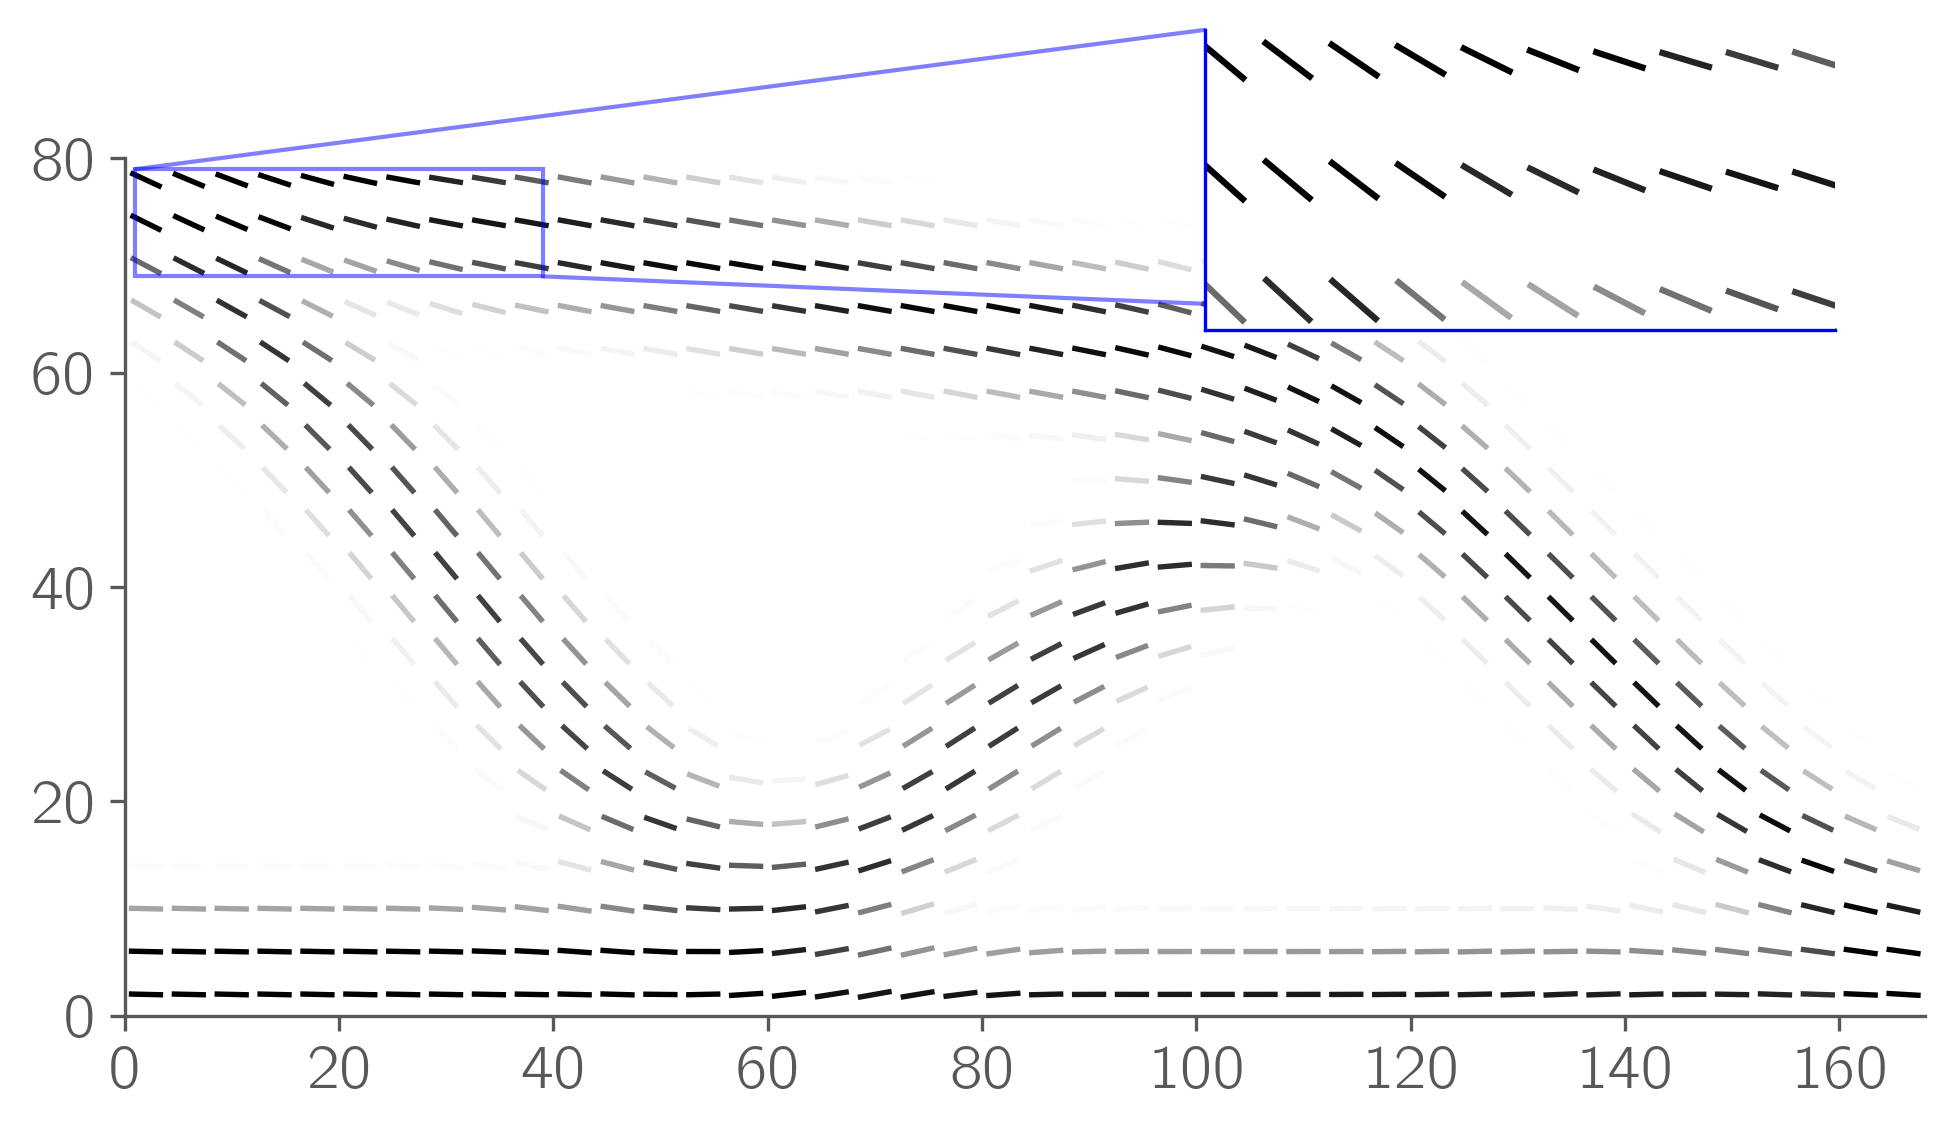

In [5]:
post1 = Post2D(solver1)
zoom = {'xmin': 1, 'xmax': 39,
       'ymin': 69, 'ymax': 79,
       'xpos': 0.6, 'ypos': 0.8,
       'width': 0.35, 'height': 0.35,
       'color': 'blue'}
post1.plot(zoom=zoom)

In [6]:
solver2 = TopOpt(inputfile='models/mbb3d.db', res_dir='results/mbb/3d/', dim='3D_layer', jobname='3d')
solver2.set_material(Ex=Ex, Ey=Ey, nuxy=nuxy, nuyz=nuxy, Gxy=Gxy)
solver2.set_volfrac(0.3)
solver2.set_filters(r_rho=8, r_theta=20)
solver2.set_initial_conditions('fix', theta0=-30)
solver2.set_optim_options(max_iter=100)

solver2.run()
solver2.save()
solver2.print_timing()

Iteration   0...  c = 35711.4658
Iteration   1...  c = 13997.1010
Iteration   2...  c =  8652.2489
Iteration   3...  c =  7005.5828
Iteration   4...  c =  4731.2934
Iteration   5...  c =  4769.1629
Iteration   6...  c =  4132.2982
Iteration   7...  c =  4201.8780
Iteration   8...  c =  4247.0348
Iteration   9...  c =  4370.4462
Iteration  10...  c =  4307.8190
Iteration  11...  c =  4321.0547
Iteration  12...  c =  4334.6456
Iteration  13...  c =  4323.1482
Iteration  14...  c =  4330.5608
Iteration  15...  c =  4309.8570
Iteration  16...  c =  4264.7031
Iteration  17...  c =  4240.3259
Iteration  18...  c =  4150.7574
Iteration  19...  c =  4168.2837
Iteration  20...  c =  4062.5909
Iteration  21...  c =  4111.6004
Iteration  22...  c =  3984.3063
Iteration  23...  c =  3993.0235
Iteration  24...  c =  3869.6250
Iteration  25...  c =  3833.8552
Iteration  26...  c =  3759.4278
Iteration  27...  c =  3673.5893
Iteration  28...  c =  3689.2903
Iteration  29...  c =  3574.7743
Iteration 

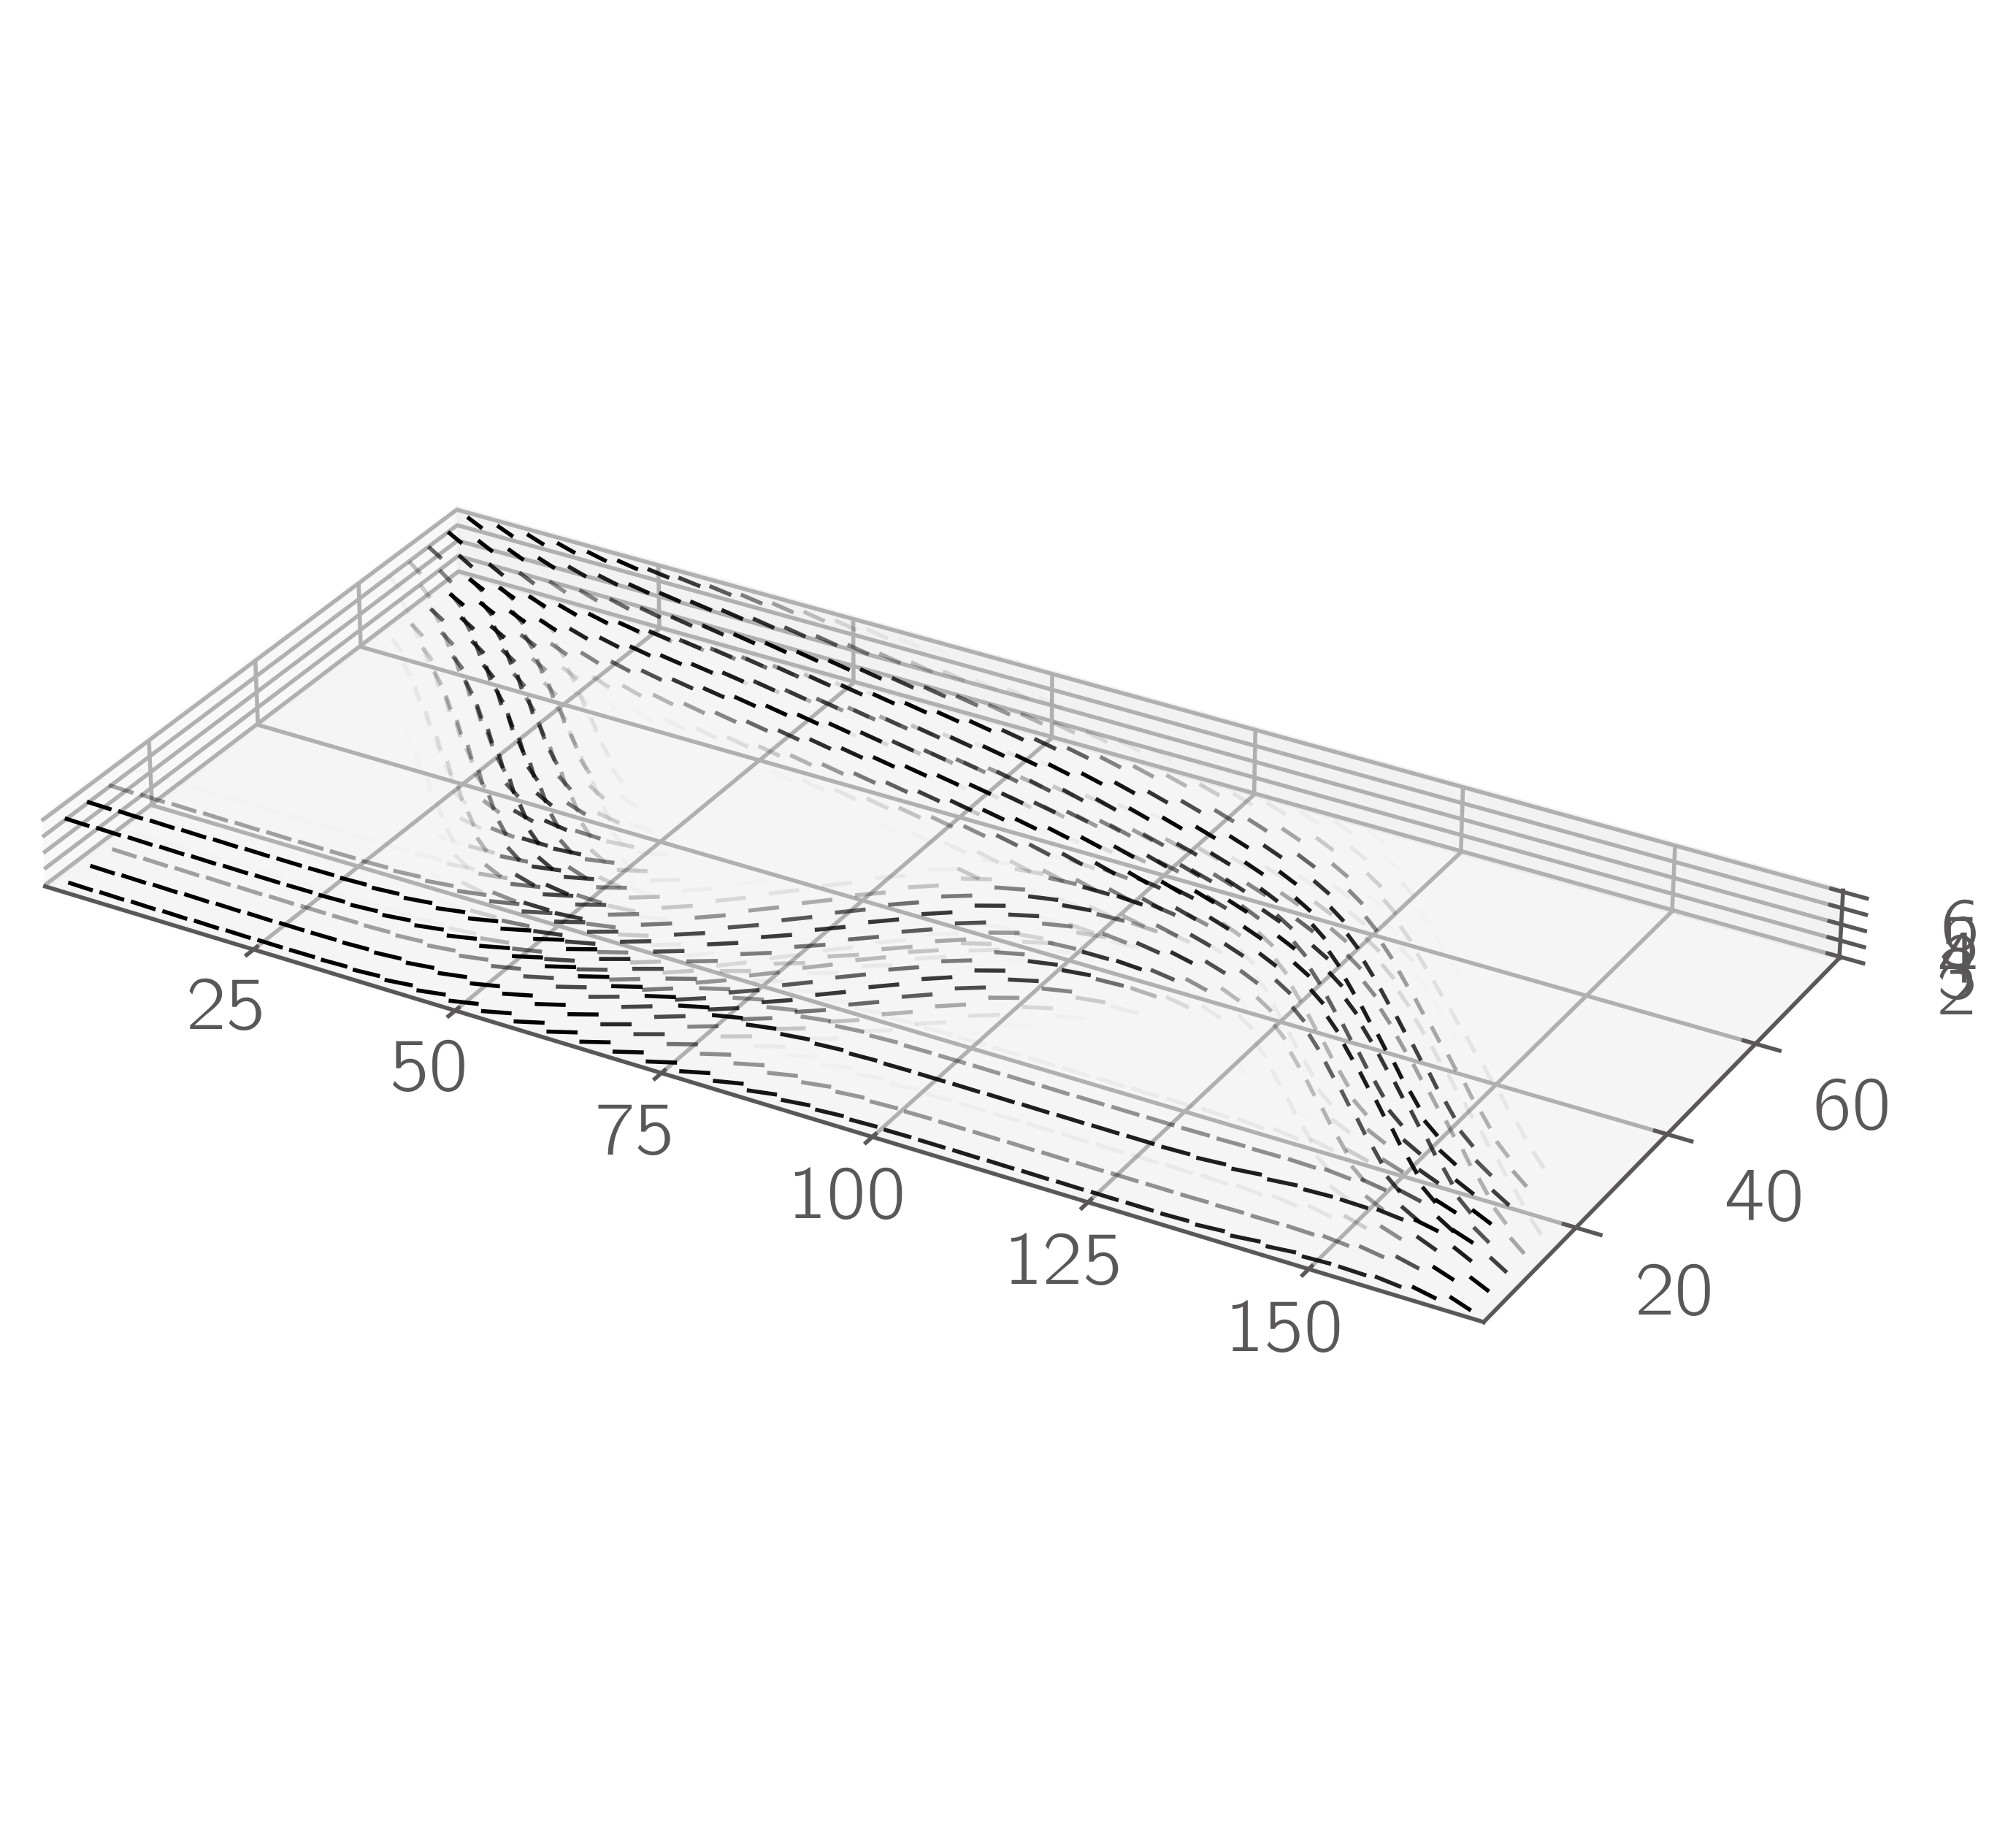

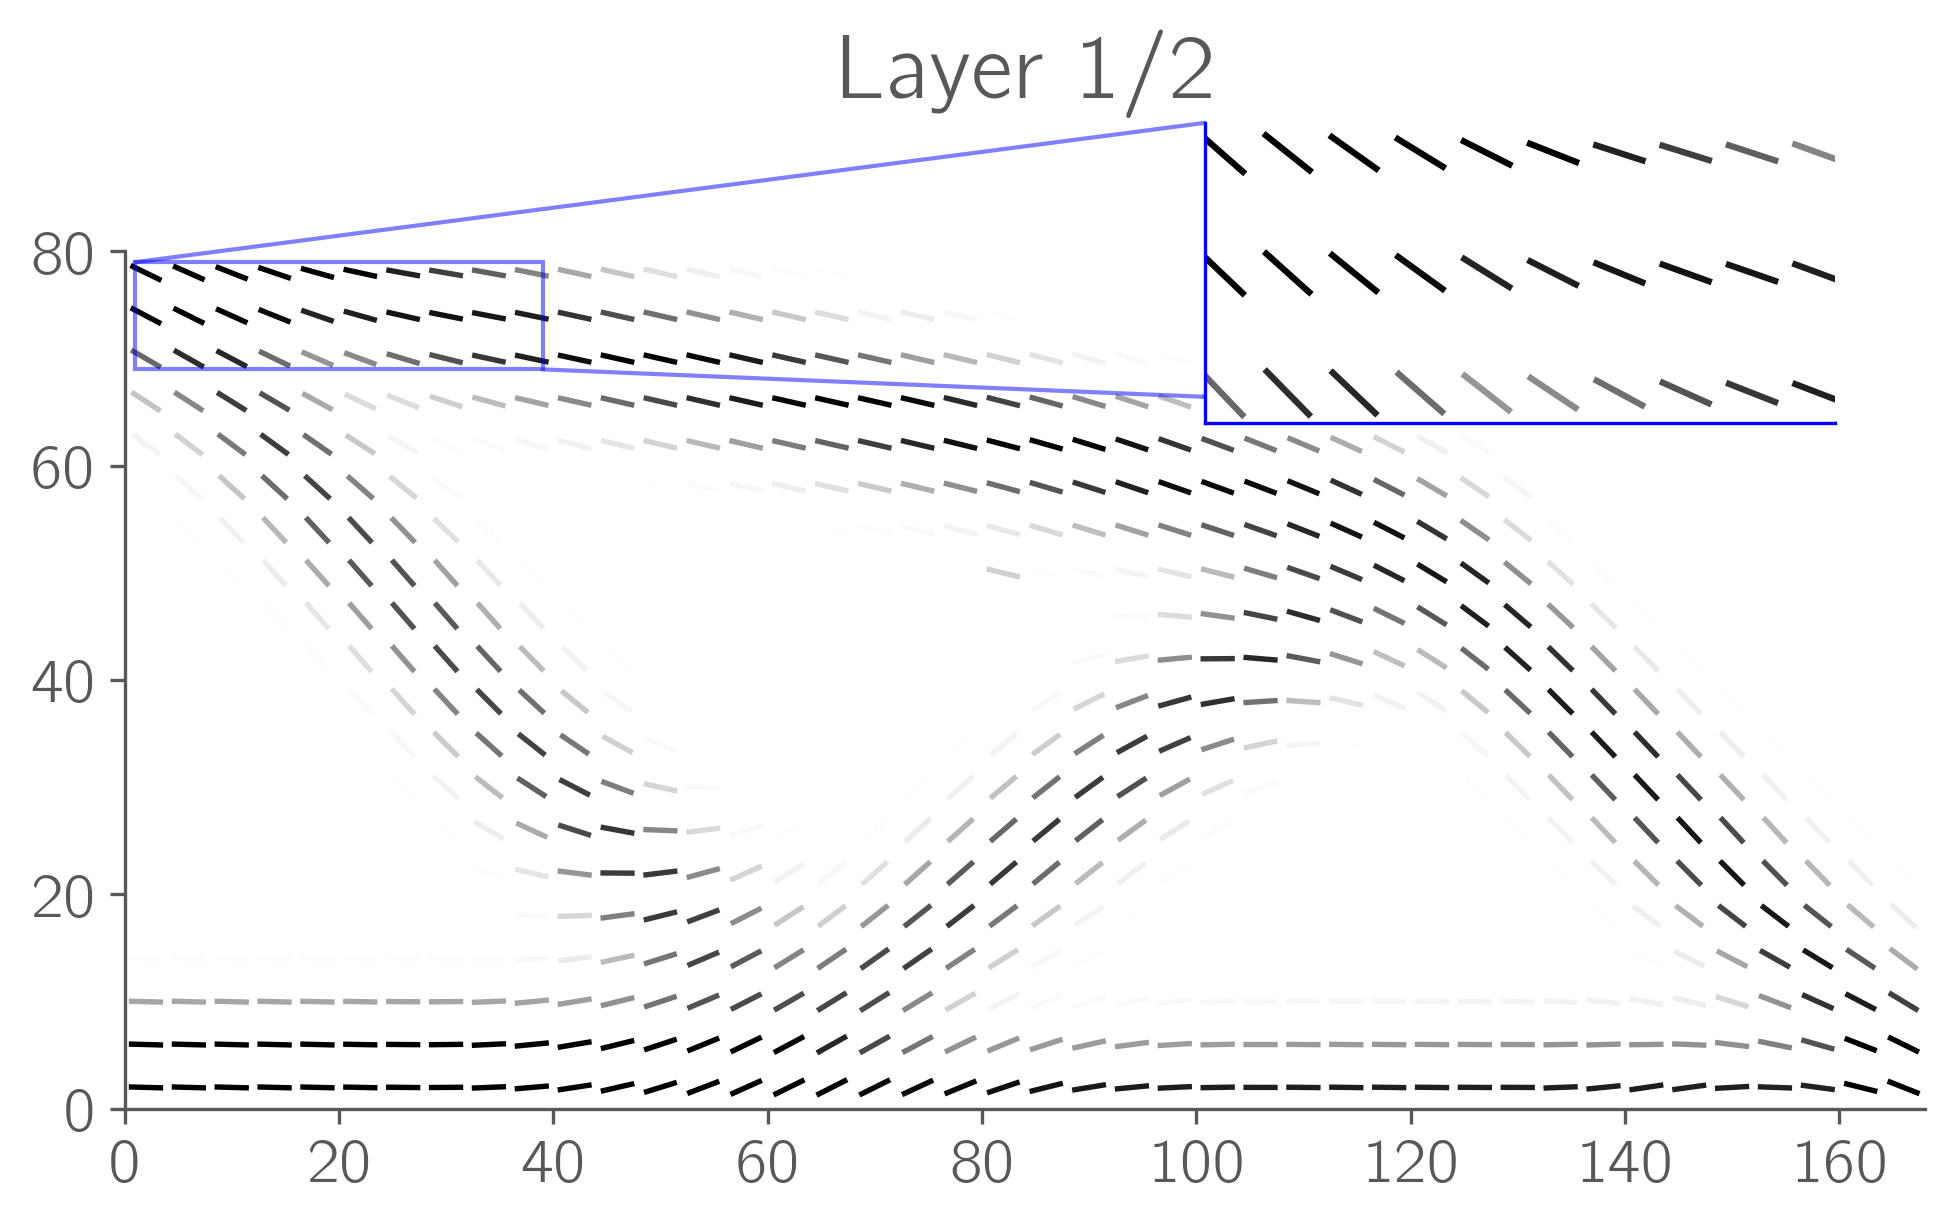

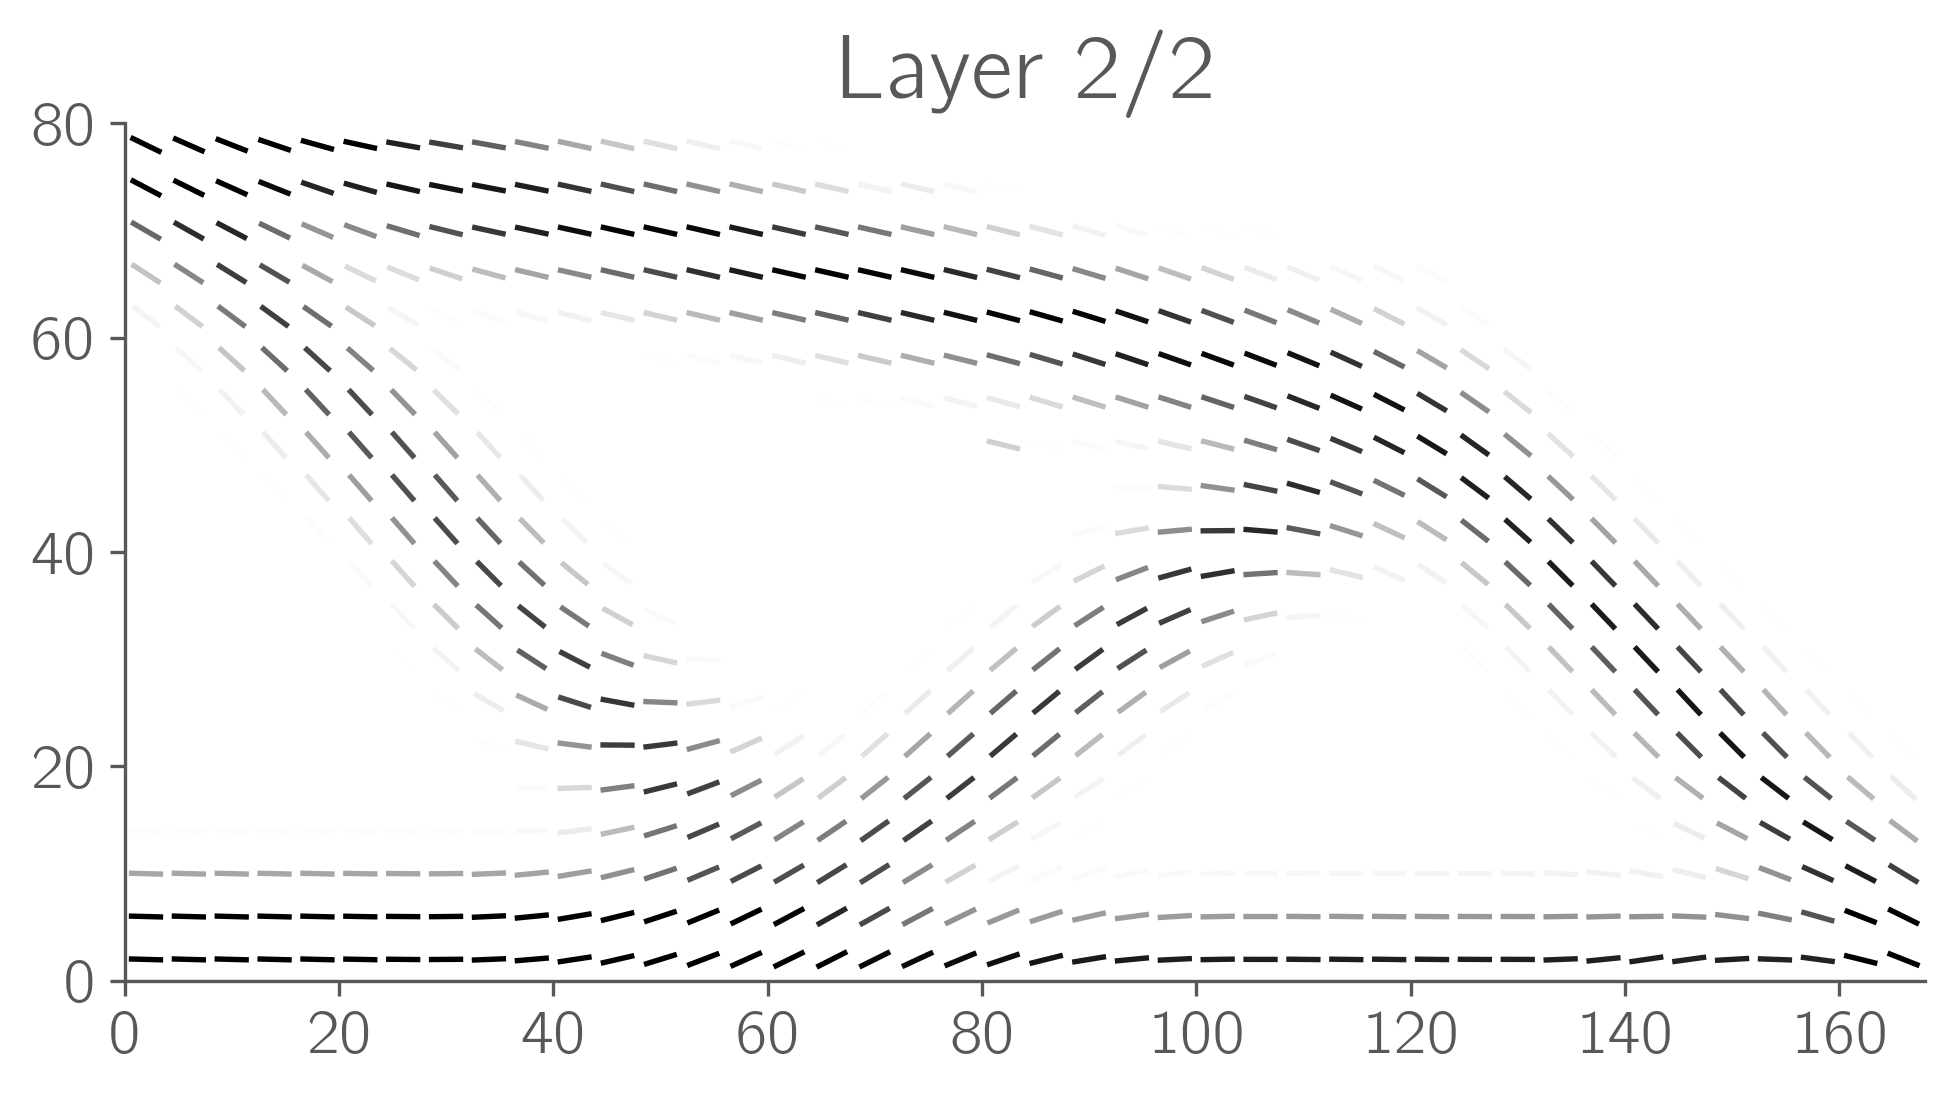

In [9]:
post2 = Post3D(solver2)
post2.plot(colorful=False)
post2.plot_layer(layer=0, zoom=zoom)
post2.plot_layer(layer=1)

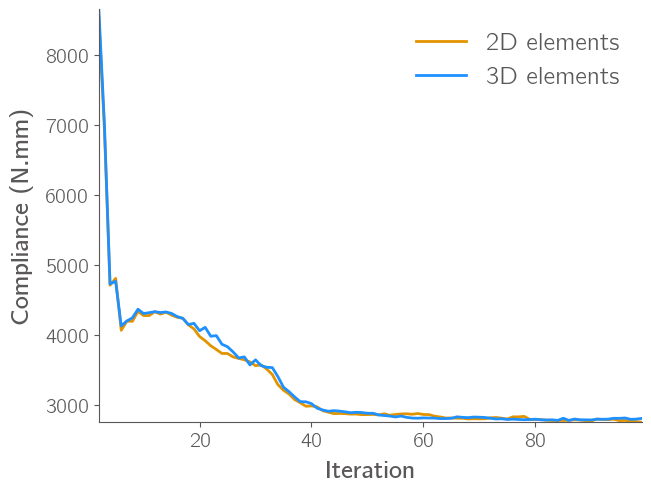

In [8]:
plt.plot(range(2,100), solver1.comp_max_hist[2:100], label='2D elements')
plt.plot(range(2,100), solver2.comp_max_hist[2:100], label='3D elements')
plt.ylabel('Compliance (N.mm)')
plt.xlabel('Iteration')
plt.legend()